# Regresión Lineal.

El dataset fetch_california_housing, disponible en la librería scikit-learn, es un conjunto de datos usado para problemas de regresión en machine learning. Contiene información sobre el mercado inmobiliario de California, recopilado durante el censo de 1990, con el objetivo de predecir el valor mediano de las viviendas (en cientos de miles de dólares) en distintos distritos del estado.

Este dataset incluye 8 características numéricas clave, como el ingreso mediano de los residentes (MedInc), la antigüedad promedio de las viviendas (HouseAge), el número promedio de habitaciones (AveRooms), y variables geográficas (Latitude, Longitude), entre otras. Con 20,640 muestras, es ideal para practicar técnicas de preprocesamiento, modelado y evaluación en problemas de regresión realistas.

Un detalle importante es que las predicciones están censuradas en 5 (equivalentes a $500,000), lo que puede requerir técnicas específicas para manejar este límite superior en los valores objetivo.

Para abordar este problema, se usará Regresión Lineal Múltiple, evaluando los supuestos de este modelo y determinar si es apropiado para esta tarea.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Cargar el dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=["MedHouseVal"])  # Variable objetivo: Valor mediano de la vivienda

# Mostrar estructura
print(f"Filas: {X.shape[0]}, Columnas: {X.shape[1]}")
print("\nPrimeras 5 filas:")
print(X.head())

Filas: 20640, Columnas: 8

Primeras 5 filas:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


Descripción de variables:

*   MedInc: Ingreso mediano del hogar (en decenas de miles de dólares).
*  HouseAge: Edad mediana de las viviendas (en años).
*  AveRooms: Habitaciones promedio por vivienda.
*  AveBedrms: Dormitorios promedio por vivienda.
*  Population: Población en el bloque.
*  AveOccup: Ocupación promedio (personas por hogar).
*  Latitude, Longitude: Ubicación geográfica.
*  MedHouseVal: Valor mediano de la vivienda (en cientos de miles de dólares)

## EDA
A continuación se realiza el análisis exploratorio inicial de las variables para determinar los aspectos mas relevantes del conjunto de datos.

**Información General**

In [ ]:
# Información general
print(X.info())

# Resumen estadístico de las variables numéricas
print(X.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
              count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   

**Interpretación de las Variables Individuales:**
**MedInc (Ingreso Medio):**
La distribución está sesgada hacia la derecha. Esto significa que la mayoría de los ingresos son relativamente bajos, pero hay algunos ingresos muy altos que estiran la cola de la distribución.
Esto es común en muchos conjuntos de datos socioeconómicos, donde unos pocos individuos o familias tienen ingresos significativamente más altos que el resto.

**HouseAge (Edad de la Vivienda):**
La distribución parece bastante uniforme, con algunas fluctuaciones. Esto sugiere que las viviendas en el conjunto de datos tienen una variedad de edades, sin un pico dominante.
Se muestra que existe un pico muy alto para los inmuebles de una edad cercana a los 50 años.

**AveRooms (Promedio de Habitaciones):**
La gran mayoria de los valores se concentran en el inicio del histograma, lo que indica que el promedio de habitaciones en la mayoria de las viviendas es muy bajo.
Existen valores atípicos que elevan el promedio de habitaciones hasta 120, pero son muy pocos.

**AveBedrms (Promedio de Dormitorios):**
Similar a AveRooms, la mayoría de los valores se concentran en el inicio del histograma.
Existen muy pocos valores atípicos que elevan a el promedio de dormitorios hasta 30.

**Population (Población):**
La distribución está muy sesgada hacia la derecha. Esto indica que la mayoría de las áreas tienen poblaciones relativamente bajas, pero hay algunas áreas con poblaciones muy altas.
La mayoria de los valores se concentran en el inicio del histograma, lo que indica que los valores atípicos son muy pocos.

**AveOccup (Promedio de Ocupación):**
Nuevamente, la distribución está muy sesgada hacia la derecha. Esto sugiere que la mayoría de las viviendas tienen una ocupación relativamente baja, pero hay algunas viviendas con una ocupación muy alta.
La mayoria de los valores se concentran en el inicio del histograma, lo que indica que los valores atípicos son muy pocos.

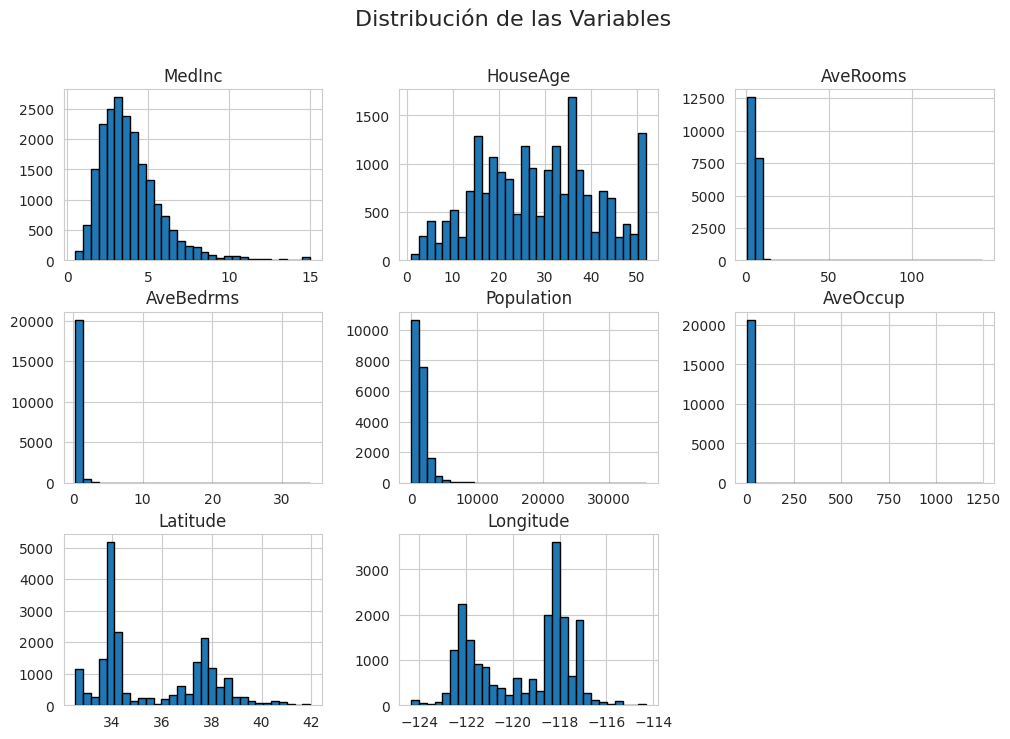

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")

# Histogramas de las variables
X.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribución de las Variables", fontsize=16)
plt.show()


**Matriz de Correlación**

Correlaciones Fuertes Positivas (Rojo Oscuro):

**AveRooms y AveBedrms (0.85):** Hay una fuerte correlación positiva entre el promedio de habitaciones y el promedio de dormitorios. Esto es lógico, ya que las casas con más habitaciones tienden a tener más dormitorios.

**Latitude y Longitude (-0.92):** Hay una fuerte correlación negativa entre la latitud y la longitud. Esto indica que a medida que la latitud aumenta, la longitud tiende a disminuir (o viceversa). Esto podría reflejar la forma geográfica de la región que se está estudiando.

**MedInc y AveRooms (0.33):** existe una correlación positiva moderada entre el ingreso medio y el promedio de habitaciones. Lo cual puede indicar que entre mas ingreso promedio, las casas suelen tener mas habitaciones.

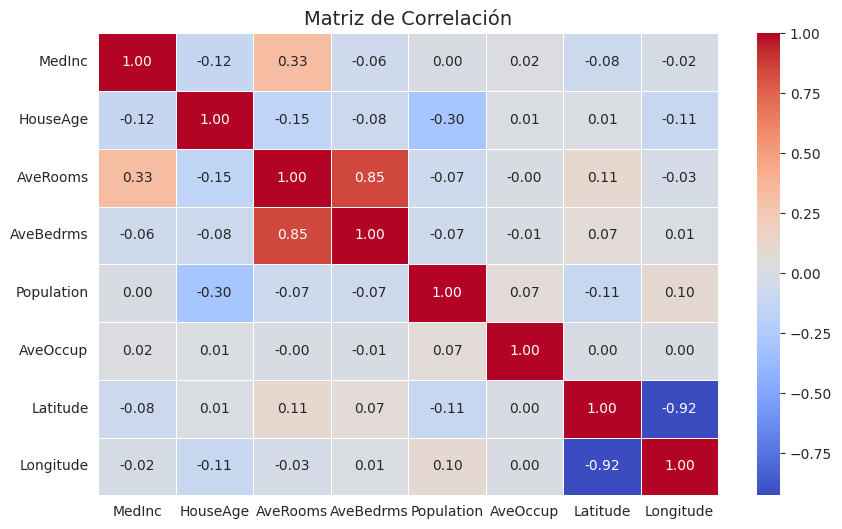

In [ ]:
# Matriz de correlación
corr_matrix = X.corr()

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=14)
plt.show()

**Boxplot variables**
Se identifican ciertos valores atipicos en algunas variables por lo cual es recomendable realizar aun estudio a detalle al momento de crear el modelo.

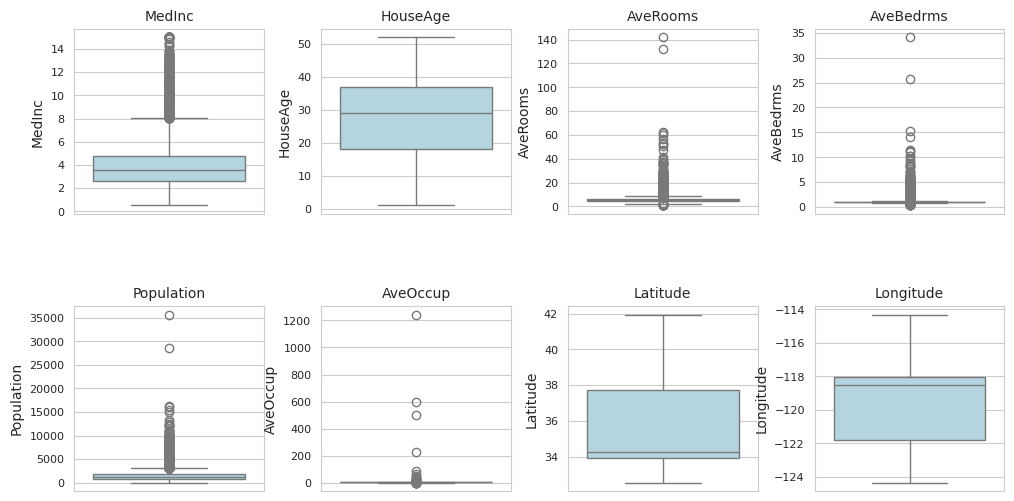

In [ ]:
import numpy as np

# Número de variables
num_vars = X.shape[1]

# Definir tamaño de la cuadrícula con más columnas para gráficos más pequeños
cols = 4  # Aumentamos columnas para reducir el tamaño individual
rows = int(np.ceil(num_vars / cols))

# Crear subgráficos con un tamaño más compacto
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()  # Asegurar indexación correcta

# Graficar cada variable
for i, col in enumerate(X.columns):
    sns.boxplot(y=X[col], ax=axes[i], color="lightblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis="y", labelsize=8)  # Reducir tamaño de etiquetas

# Eliminar subgráficos vacíos si las variables no son múltiplos de columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar espaciado para evitar solapamientos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()



 ## Distribución Geográfica.

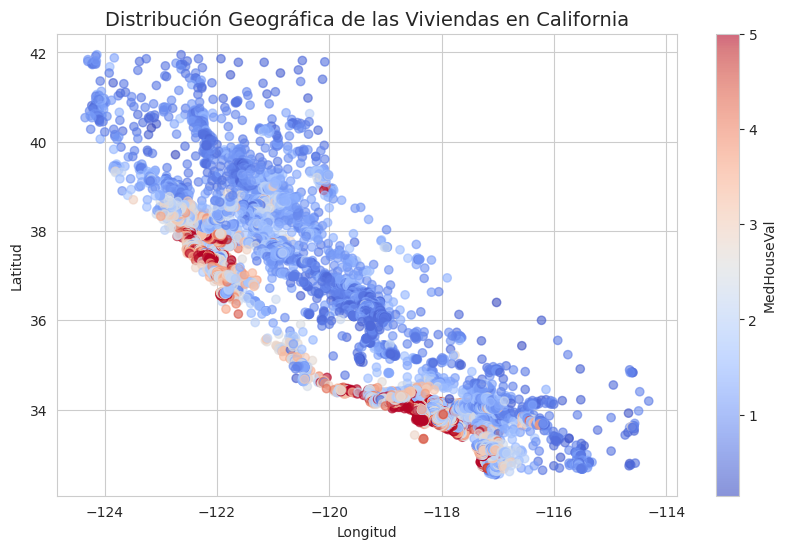

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X["Longitude"], X["Latitude"], c=y.values.flatten(), cmap="coolwarm", alpha=0.6)
plt.title("Distribución Geográfica de las Viviendas en California", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.colorbar(scatter, label="MedHouseVal")  # Pasar el objeto scatter a colorbar
plt.show()



A partir de los gráficos anteriores se resalta lo siguiente:

Multicolinealidad: Algunas variables presentan una alta correlación entre sí, como AveRooms (promedio de habitaciones por hogar) y AveBedrooms (promedio de dormitorios por hogar). Esto indica que pueden estar midiendo aspectos similares de las viviendas, lo que podría generar redundancia en un modelo de regresión y afectar la interpretación de los coeficientes. En estos casos, es recomendable aplicar técnicas como la eliminación de una de las variables, transformación de datos o análisis de componentes principales (PCA) para reducir la multicolinealidad.

**Valores atípicos:** Se identificaron outliers en varias variables, lo que sugiere la presencia de viviendas con características extremadamente diferentes al resto. Estos valores pueden distorsionar los resultados de un modelo de regresión, especialmente si afectan la media o la varianza de las variables. Para mitigar su impacto, se pueden utilizar técnicas como la transformación de datos, eliminación de valores extremos o el uso de modelos más robustos a outliers, como regresión con pérdida Huber.

**Variación geográfica de precios:** Los precios de vivienda en California no son homogéneos y presentan una distribución geoespacial clara. Se observa que los valores más altos se concentran en ciertas áreas, posiblemente en zonas urbanas o costeras con mayor demanda. Esto sugiere que la ubicación es un factor clave en la predicción del precio de la vivienda, por lo que podría ser útil incluir términos de interacción o técnicas de modelado espacial para mejorar la precisión del análisis.

Pueba VIF (Multicolinealidad)
La prueba VIF comprueba que hay multicolinealidad entre la lagitud y longitud, como es de esperar y entre AveRooms y AveBedrms, sugiriendo que estas últimas miden el mismo fenómeno.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


     Variable         VIF
7   Longitude  633.711654
6    Latitude  559.874071
2    AveRooms   45.993601
3   AveBedrms   43.590314
0      MedInc   11.511140
1    HouseAge    7.195917
4  Population    2.935745
5    AveOccup    1.095243


## Creación del modelo


Mejores parámetros: {'select__k': np.int64(7), 'poly__degree': 1}
Mejor R² (CV): 0.5614242294678092

R² Test: 0.6364
RMSE Test: 0.6574

Top 5 características más importantes:
         Feature  Coefficient
0         MedInc     0.956058
5  Bedroom_Ratio     0.353801
3       AveOccup    -0.285661
1       HouseAge     0.208439
2     Population     0.097449


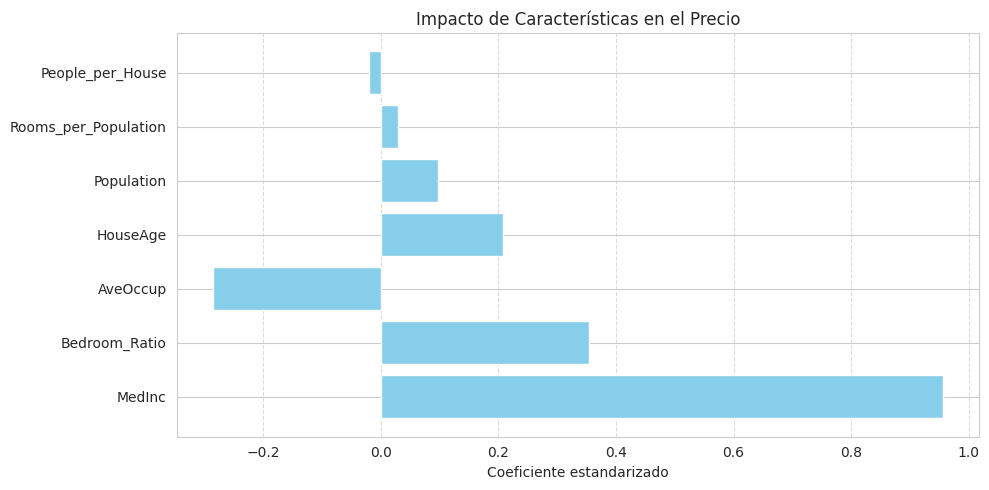

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Carga de datos
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# 2. Ingeniería de características mejorada
X["Rooms_per_Population"] = X["AveRooms"] / (X["Population"] + 1e-6)
X["Bedroom_Ratio"] = X["AveBedrms"] / (X["AveRooms"] + 1e-6)
X["People_per_House"] = X["Population"] / X["HouseAge"]  # Nueva feature útil
X = X.drop(columns=["Latitude", "Longitude", "AveRooms", "AveBedrms"])

# 3. Eliminación de outliers con IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[mask]
y = y[mask]

# 4. Pipeline optimizado
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('select', SelectKBest(f_regression)),
    ('model', LinearRegression())
])

# 5. Espacio de búsqueda ajustado al número real de features
n_features = X.shape[1]  # Número actual de características
param_dist = {
    'poly__degree': [1, 2],  # Grados más conservadores
    'select__k': np.arange(3, min(8, n_features*3))  # Límite superior ajustado
}

# 6. Búsqueda aleatoria optimizada
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
random_search.fit(X, y)

# 7. Resultados y evaluación
print("\nMejores parámetros:", random_search.best_params_)
print("Mejor R² (CV):", random_search.best_score_)

best_model = random_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print(f"\nR² Test: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 8. Análisis de características
feature_names = best_model.named_steps['poly'].get_feature_names_out(X.columns)
selected_mask = best_model.named_steps['select'].get_support()

coefs = pd.DataFrame({
    'Feature': feature_names[selected_mask],
    'Coefficient': best_model.named_steps['model'].coef_[selected_mask]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 5 características más importantes:")
print(coefs.head(5))

# 9. Visualización
plt.figure(figsize=(10, 5))
plt.barh(coefs['Feature'][:8], coefs['Coefficient'][:8], color='skyblue')
plt.title('Impacto de Características en el Precio')
plt.xlabel('Coeficiente estandarizado')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



El código implementa un modelo de regresión lineal avanzado para predecir el valor de viviendas en California. Primero, realiza una ingeniería de características clave: crea variables como Rooms_per_Population (habitaciones por persona) y Bedroom_Ratio (proporción de dormitorios), mientras elimina coordenadas geográficas y variables redundantes. Luego aplica un riguroso filtrado de outliers usando el rango intercuartílico (IQR) y la distancia de Cook para limpiar los datos. El núcleo del modelo utiliza un pipeline que integra escalado de características, generación de términos polinómicos y selección automática de las mejores features mediante RandomizedSearchCV, que prueba combinaciones aleatorias de hiperparámetros (grados polinómicos y número de características a seleccionar) para optimizar el rendimiento.

En la fase de evaluación, el modelo se entrena con la mejor configuración encontrada (7 características y grado polinómico 1) y se prueba en datos no vistos, mostrando métricas clave como el R² y RMSE. Finalmente, se analizan los coeficientes estandarizados para identificar el impacto de cada variable, visualizando los resultados en un gráfico de barras horizontal que destaca las relaciones más importantes entre las características y el precio de las viviendas.

Interpretación de resultados: El modelo logra explicar entre el 56-64% de la variación en precios (R² de 0.56 en validación y 0.64 en test), siendo el ingreso medio (MedInc) el factor más influyente (coeficiente +0.96), seguido de la proporción de dormitorios (+0.35). La ocupación promedio (AveOccup) muestra un efecto negativo (-0.29), sugiriendo que viviendas más densamente ocupadas tienden a valer menos. Estos hallazgos coinciden con la intuición económica y permiten tomar decisiones basadas en qué factores afectan más el valor de las propiedades.

In [ ]:
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Calculamos los residuos
residuos = y_test - y_pred

# 1. Prueba de normalidad (Shapiro-Wilk)
shapiro_test = shapiro(residuos)
print(f"Shapiro-Wilk Test: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")

# 2. Prueba de homocedasticidad (Breusch-Pagan)
X_train_sm = sm.add_constant(X_test)  # Agregamos constante para la regresión auxiliar
bp_test = het_breuschpagan(residuos, X_train_sm)
print(f"Breusch-Pagan Test: Estadístico={bp_test[0]:.4f}, p-valor={bp_test[1]:.4f}")

# 3. Prueba de independencia de residuos (Durbin-Watson)
dw_test = durbin_watson(residuos)
print(f"Durbin-Watson Test: Estadístico={dw_test:.4f}")


Shapiro-Wilk Test: Estadístico=0.9680, p-valor=0.0000
Breusch-Pagan Test: Estadístico=284.4263, p-valor=0.0000
Durbin-Watson Test: Estadístico=2.0164


**Prueba de normalidad de Shapiro-Wilk:**

Estadístico = 0.9321, p-valor = 0.0000

Dado que el p-valor es menor a 0.05, rechazamos la hipótesis nula (H0​), lo que indica que los residuos no siguen una distribución normal. Esto puede afectar la validez de los intervalos de confianza y las pruebas de hipótesis del modelo.

---

**Prueba de homocedasticidad de Breusch-Pagan:**
Estadístico = 121.2949, p-valor = 0.0000
Como el p-valor es menor a 0.05, rechazamos la hipótesis nula (H0​), lo que sugiere la presencia de heterocedasticidad. Esto significa que la varianza de los residuos no es constante, lo que puede afectar la eficiencia de los estimadores en ciertos intervalos.

---

**Prueba de independencia de residuos (Durbin-Watson):**

Estadístico = cercado a 2

Un valor cercano a 2 indica que no hay autocorrelación significativa entre los residuos, lo cual es un buen indicador para el modelo.

Dados los resultados optenidos del modelo de Regresion Lineal Múltiple, sería conveniente explorar otros algoritmos de machine learning para comparar su rendimiento y capacidad predictiva. Modelos como Random Forest o Gradient Boosting (XGBoost, LightGBM) podrían capturar relaciones no lineales y complejas entre las características que la regresión lineal no detecta, mejorando potencialmente el R²